In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
import itertools

import rdkit
import rdkit.Chem
import rdkit.Chem.PandasTools
import rdkit.Chem.Descriptors

In [2]:
sns.set(color_codes=True)
rdkit.Chem.PandasTools.RenderImagesInAllDataFrames(images=True)
SKIP_DRAW=True

In [3]:
CIRC_SMILE_REP=10
csv_file = "raw_data.csv"
image_path="images"
    
categorical_columns=["polymer_class",'smiles_monomer','additive','polymer_concentration']
histo_columns=["z_average",'temperature','mean_count_rate','intensity_mean', 'number_mean','dispersity','mn','pdi',]

beautiful_cols={**{c:c.capitalize().replace("_"," ") for c in histo_columns},
                **{c:c.capitalize().replace("_"," ") for c in categorical_columns},
            **{"z_average": "Z-Average",
               'mean_count_rate':"Diameter by mean count rate",
               'intensity_mean':"Diameter by intensity mean",
               'number_mean':"Diameter by number means",
           }}
units={**{c:None for c in histo_columns},
                **{c:None for c in categorical_columns},
            **{"z_average": "nm",
               'polymer_concentration':"g/L",
               'temperature':"°C",
               'mean_count_rate': "nm",
                'intensity_mean': "nm",
                'number_mean': "nm",
               'mn':"g/mol"
               
           }}

#data cleanup parameter
z_average_cutoff=500
dispersity_cutoff= 0.3
cutoff_size_disp=200
cutoff_group_size=3
cutoff_min_conc=2
valid_threshold=0.2

filter_map={
    'polymer_class':["methacrylate"],
    
}

remove_map={
    'smiles_ru':['[CH2][C](C)(C(=O)OC(C)(C)C)'],
}

#train_outsmiles='C3[C](C)(C(=O)OCC(C)C)[CH2][C](C)(C(=O)OCC(C)C)[CH2][C](C)(C(=O)OCC(C)C)[CH2][C](C)(C(=O)OCC(C)C)[CH2][C](C)(C(=O)OCC(C)C)[CH2][C](C)(C(=O)OCC(C)C)[CH2][C](C)(C(=O)OCC(C)C)[CH2][C](C)(C(=O)OCC(C)C)[CH2][C](C)(C(=O)OCC(C)C)[CH2][C](C)(C(=O)OCC(C)C)3'

In [4]:
image_path=os.path.abspath(image_path)
os.makedirs(image_path,exist_ok=True)
image_path_dist=os.path.join(image_path,"dists")
os.makedirs(image_path_dist,exist_ok=True)
image_path_hist=os.path.join(image_path,"hists")
os.makedirs(image_path_hist,exist_ok=True)

image_path_group=os.path.join(image_path,"group_size_conc")
os.makedirs(image_path_group,exist_ok=True)

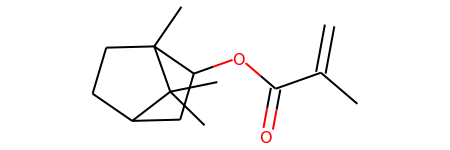

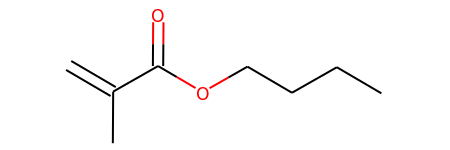

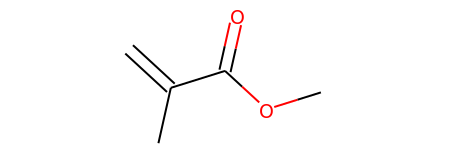

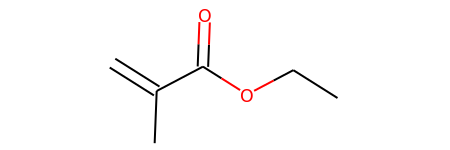

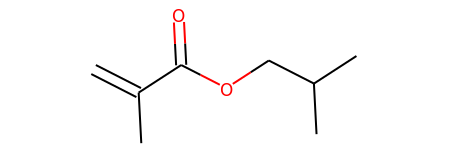

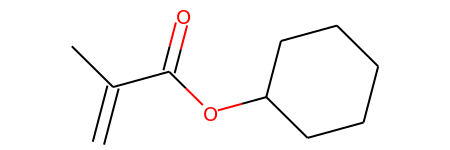

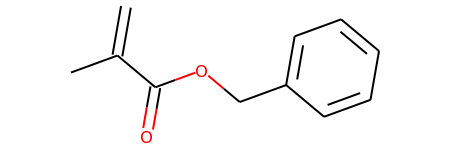

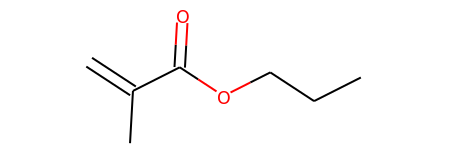

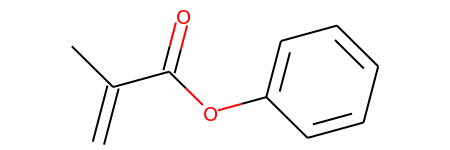

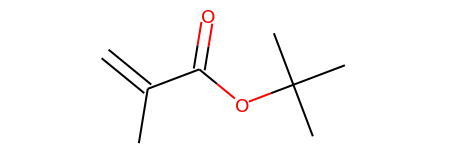

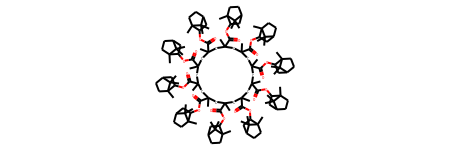

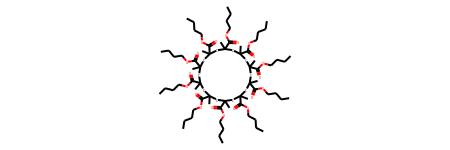

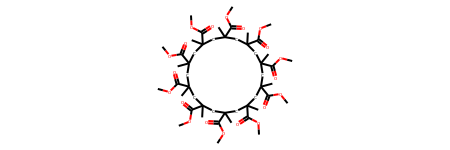

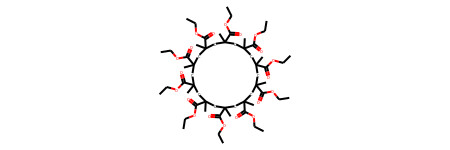

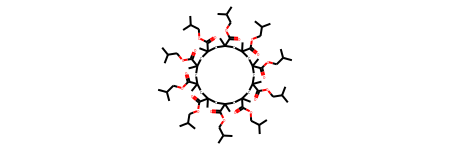

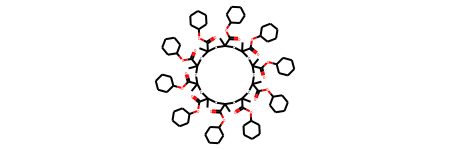

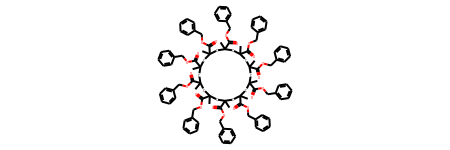

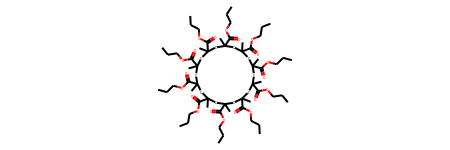

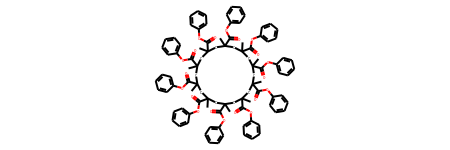

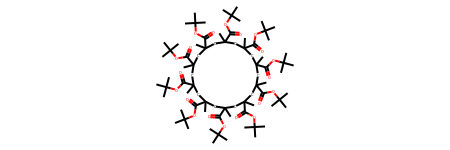

In [5]:
df=pd.read_csv(csv_file)

unique_smiles = list(df["smiles_monomer"].unique())
mols = [rdkit.Chem.MolFromSmiles(smiles) for smiles in unique_smiles]

for i,un_smiles in enumerate(unique_smiles):
    boolrange = df["smiles_monomer"]==un_smiles
    df.loc[boolrange,"monomer_mol"]=mols[i]
   
    display(mols[i])

unique_smiles = list(df["smiles_ru"].unique())
mols = [rdkit.Chem.MolFromSmiles(smiles) for smiles in unique_smiles]

circle_smiles = [(smiles*CIRC_SMILE_REP+str(max(map(int, [e for e in re.split("[^0-9]", smiles) if e != '']))+1)).replace("[CH2]","C"+str(max(map(int, [e for e in re.split("[^0-9]", smiles) if e != '']))+1),1) for smiles in unique_smiles]
circle_mols = [rdkit.Chem.MolFromSmiles(smiles) for smiles in circle_smiles]

for i,un_smiles in enumerate(unique_smiles):
    boolrange = df["smiles_ru"]==un_smiles
    df.loc[boolrange,"repeating_unit_mol"]=mols[i]
    df.loc[boolrange,"mass_ru"]=rdkit.Chem.Descriptors.MolWt(mols[i])
    df.loc[boolrange,"circular_smiles_{}".format(CIRC_SMILE_REP)]=circle_smiles[i]
    df.loc[boolrange,"circ_mol"]=circle_mols[i]
    display(circle_mols[i])

df["dp"] = df["mn"] / df["mass_ru"]

In [6]:
print(df['smiles_ru'].unique())
for k,g in df.groupby(["polymer_class","polymer"]):
    print(k)
    print(g["dp"].unique())
    print(g['smiles_ru'].unique())
    #display(g)


['[CH2][C](C)(C(=O)OC1CC2CCC1(C)C2(C)C)' '[CH2][C](C)(C(=O)OCCCC)'
 '[CH2][C](C)(C(=O)OC)' '[CH2][C](C)(C(=O)OCC)'
 '[CH2][C](C)(C(=O)OCC(C)C)' '[CH2][C](C)(C(=O)OC1CCCCC1)'
 '[CH2][C](C)(C(=O)OCc1ccccc1)' '[CH2][C](C)(C(=O)OCCC)'
 '[CH2][C](C)(C(=O)Oc1ccccc1)' '[CH2][C](C)(C(=O)OC(C)(C)C)']
('methacrylate', 'PMMA')
[ 164.8071756    81.90417212  263.69148097  296.65291609  146.82821099
 1012.81500644]
['[CH2][C](C)(C(=O)OC)']
('methacrylate', 'Poly-Ethyl MA')
[133.16512475  66.58256238 196.24334174]
['[CH2][C](C)(C(=O)OCC)']
('methacrylate', 'Poly-Isobornyl MA')
[ 83.66017776 120.54262171  55.32366594]
['[CH2][C](C)(C(=O)OC1CC2CCC1(C)C2(C)C)']
('methacrylate', 'Poly-Phenyl MA')
[171.40602264  66.58939009 114.68172738]
['[CH2][C](C)(C(=O)Oc1ccccc1)']
('methacrylate', 'Poly-Propyl MA')
[223.13939971  81.14159989 127.95406137]
['[CH2][C](C)(C(=O)OCCC)']
('methacrylate', 'Poly-butyl MA')
[179.3274167   66.80825328 110.40942911]
['[CH2][C](C)(C(=O)OCCCC)']
('methacrylate', 'Poly-c-hexyl MA'

In [7]:
df["with_pva"] = (df['additive'] == "PVA")*1

In [8]:
step=0
df["valid"]=1
def distplot(col,label=None):
    fig=plt.figure()
    ax = sns.countplot(df[df["valid"]>0][col].fillna("None"))
    plt.title("Distribution")
    plt.ylabel("count")
    if label:
        plt.xlabel(label)
    elif col in beautiful_cols:
        plt.xlabel(beautiful_cols[col])
    plt.xticks(rotation=90)
    
    h_max=0
    for p in ax.patches:
        h_max=max(h_max,p.get_height())
    
    all_heights = sum([p.get_height() for p in ax.patches])
    for p in ax.patches:
        ax.annotate(
            "{:.2f}%".format(100*p.get_height()/all_heights),
            (p.get_x()+p.get_width()/2,h_max*0.05),# x text postion
            rotation = 90, # text rotation
            ha='center',# horizontal anchor of text
            va='bottom'
        )
    plt.tight_layout()
    #fig.autofmt_xdate()
    plt.savefig(os.path.join(image_path_dist,"{}_{}.png".format(step,col)),dpi=200)
    if not SKIP_DRAW:
        plt.show() # shows the plot
    plt.close() # close the current plot to display new

def histplot(col,label=None):
    sizes = np.array(df[df["valid"]>0][col])
    sns.distplot(sizes, 50, rug=True,kde=False)
    if label:
        plt.xlabel(label)
    elif col in beautiful_cols:
        plt.xlabel(beautiful_cols[col])
    plt.ylabel('count')
    plt.xlabel(beautiful_cols[col]+(" [{}]".format(units[col]) if units[col] is not None else ""))
    plt.title('Histogram of {}'.format(beautiful_cols[col]))
    plt.savefig(os.path.join(image_path_hist,"{}_{}.png".format(step,col)),dpi=200)
    plt.show()
    
def display_df():
    global step
    print(len(df[df["valid"]>0]),"data points in step",step)
    if not SKIP_DRAW:
        #z-average plot
        
        for col in histo_columns:
            if col in df.columns:
                histplot(col)
        
        for col in categorical_columns:
            if col in df.columns:
                distplot(col)
        
        x_col="polymer_concentration"
        y_col="z_average"
        for key, group in df.groupby(["substance_code"]):
            #for subkey, subgroup in df.groupby(["mn"]):
            fig, ax1 = plt.subplots()
            plt.xlabel(beautiful_cols[x_col]+(" [{}]".format(units[x_col]) if units[x_col] is not None else ""))
            plt.ylabel(beautiful_cols[y_col]+(" [{}]".format(units[y_col]) if units[y_col] is not None else ""))
            #ax2 = ax1.twinx()
            markeriter = itertools.cycle(( 'X','o', '+','*',',', '.')) 
            palette=itertools.cycle(sns.color_palette())
            lines=[]
            for subkey, subgroup in group.groupby(["with_pva"]):
                color = next(palette)
                marker = next(markeriter)
                data=subgroup[subgroup["valid"]>0]
                x=data[x_col]
                y=data[y_col]
                xe=[]
                ye=[]
                ee=[]
                for c,cgroup in data.groupby([x_col]):
                    xe.append(c)
                    ye.append(cgroup[y_col].mean())
                    ee.append(cgroup[y_col].std())
                xe=np.array(xe)
                ye=np.array(ye)
                ee=np.array(ee)
                
                
                 
                line1 = ax1.plot(xe,ye,label=("with PVA" if subkey else "without PVA"),color=color,marker=marker,markeredgecolor="w")
                lines.extend(line1)
                ax1.plot(xe,ye+ee,alpha=0.3,color=color)
                ax1.plot(xe,ye-ee,alpha=0.3,color=color) 
                ax1.fill_between(xe, ye-ee, ye+ee,alpha=0.2,color=color)
                ax1.plot(x,y,marker=marker,linestyle='',color=color,markeredgecolor="w")     

                vx=[]
                vy=[]
                for c, vgroup in subgroup.groupby([x_col]):
                    vx.append(c)
                    vy.append(vgroup["valid"].mean())
                
                rvy=[]
                for i in range(len(vy)):
                    rvy.append(sum(*[vy[max(i-2,0):min(i+2,len(vy))]])/len(vy[max(i-2,0):min(i+2,len(vy))]))
                
                i=0
                for c, vgroup in subgroup.groupby([x_col]):
                    df.loc[vgroup.index,"roll_valid"]=rvy[i]
                    i+=1
                
                #line2 = ax2.plot(vx,rvy,"--",color=color,label="validity {}".format(subkey))
                #lines.extend(line2)
                ax1.set_title("{} ({})".format(key,group["polymer"].values[0]))
                #handles, labels = ax.get_legend_handles_labels()
            #ax2.set_ylim([0,1.1])
            label=[l.get_label() for l in lines]
            plt.legend(lines, label)
            
            #plt.legend(label,title="additive")
            #ax2.legend(title="additive")
            #handles, labels = ax1.get_legend_handles_labels()
            #plt.legend([""]+handles[:3], ["additive"]+labels[:3])
            plt.savefig(os.path.join(image_path_group,"{}_{}.png".format(step,key)),dpi=200)
            
            plt.show()
            plt.close()
    step+=1
display_df()

3753 data points in step 0


In [380]:
pre_val=df["valid"].copy()
df.loc[df["z_average"]>z_average_cutoff,"valid"]=0

display_df()
print(df[pre_val!=df["valid"]]['substance_code'].unique())

3454 data points in step 1
['TS-018b' 'TS-010c' 'TS-005' 'TS-015b' 'TS-012a' 'TS-013a' 'TS-013c'
 'TS-012c' 'TS-010a' 'TS-009b' 'TS-013b' 'SB342' 'TS-009a' 'TS-016c'
 'TS-019c' 'TS-019a' 'TS-016b' 'TS-012b' 'TS-009c' 'TS-019b' 'TS-010b'
 'TS-011c' 'TS-018c']


In [381]:
pre_val=df["valid"].copy()
df.loc[df["dispersity"]>dispersity_cutoff,"valid"]=0
display_df()
print(df[pre_val!=df["valid"]]['substance_code'].unique())

3093 data points in step 2
['TS-018b' 'TS-010c' 'TS-005' 'TS-015b' 'SB355' 'TS-012a' 'TS-013a'
 'TS-012c' 'TS-015a' 'SB343' 'TS-010a' 'TS-001' 'TS-009b' 'TS-013b'
 'SB342' 'TS-009a' 'TS-016c' 'TS-019c' 'TS-016a' 'TS-019a' 'TS-016b'
 'TS-012b' 'TS-009c' 'TS-019b' 'TS-010b' 'TS-011c' 'TS-011a' 'TS-018c'
 'TS-015c' 'TS-018a']


In [382]:
from scipy.stats import t, zscore

def grubbs(X, test='two-tailed', alpha=0.05):

    '''
    Performs Grubbs' test for outliers recursively until the null hypothesis is
    true.
    Parameters
    ----------
    X : ndarray
        A numpy array to be tested for outliers.
    test : str
        Describes the types of outliers to look for. Can be 'min' (look for
        small outliers), 'max' (look for large outliers), or 'two-tailed' (look
        for both).
    alpha : float
        The significance level.
    Returns
    -------
    X : ndarray
        The original array with outliers removed.
    outliers : ndarray
        An array of outliers.
    '''

    Z = zscore(X, ddof=1)  # Z-score
    N = len(X)  # number of samples
    
     # create array to store outliers
    outliers = np.array([])
    
    if N == 0:
        return X,outliers
    
    # calculate extreme index and the critical t value based on the test
    if test == 'two-tailed':
        extreme_ix = lambda Z: np.abs(Z).argmax()
        t_crit = lambda N: t.isf(alpha / (2.*N), N-2)
    elif test == 'max':
        extreme_ix = lambda Z: Z.argmax()
        t_crit = lambda N: t.isf(alpha / N, N-2)
    elif test == 'min':
        extreme_ix = lambda Z: Z.argmin()
        t_crit = lambda N: t.isf(alpha / N, N-2)
    else:
        raise ValueError("Test must be 'min', 'max', or 'two-tailed'")

    # compute the threshold
    thresh = lambda N: (N - 1.) / np.sqrt(N) * \
        np.sqrt(t_crit(N)**2 / (N - 2 + t_crit(N)**2))

   

    # loop throught the array and remove any outliers
    while abs(Z[extreme_ix(Z)]) > thresh(N):

        # update the outliers
        outliers = np.r_[outliers, X[extreme_ix(Z)]]
        # remove outlier from array
        X = np.delete(X, extreme_ix(Z))
        # repeat Z score
        Z = zscore(X, ddof=1)
        N = len(X)

    return X, outliers

In [383]:
pre_val=df["valid"].copy()
grouping=["substance_code","additive","polymer_concentration"]
all_colums_of_interest = ["z_average"]

for key, group in df[df["valid"]>0].groupby(grouping):
    for c in all_colums_of_interest:
        non_outliers,outliers=grubbs(group[c].values,alpha=0.1)
        for i in outliers:
            df.loc[group.index[group[c]==i],"valid"] = 0
display_df()
print(df[pre_val!=df["valid"]]['substance_code'].unique())

/home/julian/anaconda3/envs/nanoparticle_size_prediction/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/julian/anaconda3/envs/nanoparticle_size_prediction/lib/python3.7/site-packages/numpy/core/_methods.py:207: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


3052 data points in step 3
['TS-018b' 'TS-010c' 'TS-015b' 'TS-013c' 'TS-015a' 'TS-010a' 'TS-009b'
 'SB342' 'TS-019c' 'TS-016a' 'TS-019a' 'TS-016b' 'TS-012b' 'TS-009c'
 'TS-019b' 'TS-010b' 'TS-011a' 'TS-015c' 'TS-018a' 'TS-002']


In [384]:
pre_val=df["valid"].copy()
grouping=["substance_code","additive","polymer_concentration"]
all_colums_of_interest = ["z_average"]

for key, group in df[df["valid"]>0].groupby(grouping):
    for c in all_colums_of_interest:
        if group[c].max()-group[c].min()>cutoff_size_disp:
            df.loc[group.index,"valid"] = 0
display_df()
print(df[pre_val!=df["valid"]]['substance_code'].unique())

3035 data points in step 4
['TS-018b' 'TS-013a']


In [385]:
pre_val=df["valid"].copy()
grouping=["substance_code","additive","polymer_concentration"]
all_colums_of_interest = ["z_average"]

for key, group in df[df["valid"]>0].groupby(grouping):
    for c in all_colums_of_interest:
        if group[c].size<cutoff_group_size:
            df.loc[group.index,"valid"] = 0
display_df()
print(df[pre_val!=df["valid"]]['substance_code'].unique())

3010 data points in step 5
['TS-015b' 'TS-012a' 'TS-013a' 'TS-010a' 'TS-009b' 'SB342' 'TS-019c'
 'TS-016a' 'TS-019a' 'TS-016b' 'TS-009c' 'TS-018c']


In [386]:
pre_val=df["valid"].copy()
grouping=["substance_code","additive","polymer_concentration"]
mean_df=pd.DataFrame(columns=grouping+["z_average","indices"])
l=0
for key, group in df[df["valid"]>0].groupby(grouping):
    d=dict(zip(grouping,key))
    d["z_average"] = group["z_average"].mean()
    d["indices"]=group.index.values
    mean_df.loc[l]=d
    l+=1

grouping=["substance_code","additive"]
for key, group in mean_df.sort_values("polymer_concentration").groupby(grouping):
    for i in reversed(range(1,len(group["z_average"]))):
        if group["z_average"].values[i] - group["z_average"].values[i-1] < 0:
            df.loc[group["indices"].values[i],"valid"] = 0
        else:
            break
            
display_df()
print(df[pre_val!=df["valid"]]['substance_code'].unique())

2917 data points in step 6
['TS-010c' 'TS-012a' 'TS-013a' 'TS-015a' 'TS-010a' 'TS-012b' 'TS-010b'
 'TS-018c' 'TS-015c']


In [387]:
pre_val=df["valid"].copy()
grouping=["substance_code","additive","polymer_concentration"]
mean_df=pd.DataFrame(columns=grouping+["z_average","indices"])
l=0
for key, group in df[df["valid"]>0].groupby(grouping):
    d=dict(zip(grouping,key))
    d["z_average"] = group["z_average"].mean()
    d["indices"]=group.index.values
    mean_df.loc[l]=d
    l+=1

grouping=["substance_code","additive"]
for key, group in mean_df.sort_values("polymer_concentration").groupby(grouping):
    for i in range(len(group["z_average"])-1):
        #print(group["z_average"].values[i+1] , group["z_average"].values[i],group["z_average"].values[i+1] - group["z_average"].values[i])
        if group["z_average"].values[i+1] - group["z_average"].values[i] < 0:
            df.loc[group["indices"].values[i],"valid"] = 0
        else:
            break
    
    
display_df()
print(df[pre_val!=df["valid"]]['substance_code'].unique())

2823 data points in step 7
['TS-018b' 'TS-015b' 'TS-013c' 'SB343' 'TS-001' 'TS-013b' 'SB342'
 'TS-016c' 'TS-019a' 'TS-011b' 'TS-012b' 'TS-011c']


In [388]:
pre_val=df["valid"].copy()
cutoff_min_conc=2

grouping=["substance_code","additive"]
all_colums_of_interest = ["z_average"]

for key, group in df[df["valid"]>0].groupby(grouping):
    if len(group["polymer_concentration"].unique())<cutoff_min_conc:
        df.loc[group.index,"valid"] = False

display_df()
print(df[pre_val!=df["valid"]]['substance_code'].unique())

2813 data points in step 8
['TS-018c']


In [389]:

stds = []
std_errors = []
rel_errors = []
means = []
group_sizes = []
for k,group in df[df["valid"]>0].groupby(["substance_code","additive","polymer_concentration"]):
    size = group["z_average"]
    std = size.std()
    error = np.abs((size-size.mean()))
    std_calc = np.sqrt((error**2).sum()/(len(size)-1))
    #print(std,std_calc)
    rel_error = np.abs((size-size.mean())/size.mean())
    std_errors.append(std/len(size))
    df.loc[group.index,"mean_z_average"]=size.mean()
    stds.append(std)
    means.append(size.mean())
    group_sizes.append(len(size))

stds=np.abs(stds)
std_errors=np.abs(std_errors)
means=np.abs(means)
group_sizes=np.abs(group_sizes)
    
error = np.abs(df[df["valid"]>0]["z_average"] - df[df["valid"]>0]["mean_z_average"])
rel_error=error/df[df["valid"]>0]["z_average"]

coeeff_of_var = (stds/means)
coeeff_of_var_star = (1+1/(4*group_sizes))*coeeff_of_var
print("mean rel error",100*rel_error.mean())
print("coeeff of variation",100*coeeff_of_var.mean())
print("coeeff of variation*",100*coeeff_of_var_star.mean())
print("mean std errors",std_errors.mean())

mean rel error 2.9726905137526147
coeeff of variation 3.776294581424954
coeeff of variation* 3.90214058726348
mean std errors 1.2122218455938285


In [390]:
stat_df = df[df["valid"]>0].groupby(["substance_code","additive","polymer_concentration"]).describe()['z_average']

In [391]:

stat_df["var"] = stat_df["std"]**2



stat_df["coeff_of_var"] = stat_df['std']/stat_df['mean']
stat_df["coeff_of_var_star"] = stat_df["coeff_of_var"]*(1+1/(4*stat_df["count"]))

stat_df["std_error"] = stat_df["std"]/np.sqrt(stat_df["count"])
stat_df["rel_std_error"] = stat_df["std_error"]/stat_df['mean']


stat_df_res = stat_df.reset_index()

In [392]:
100*(stat_df_res["std_error"]/stat_df_res["mean"]).mean()

1.3619734667953467

In [393]:
100*(stat_df_res["coeff_of_var_star"].mean())

3.90214058726348

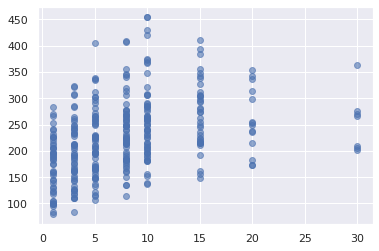

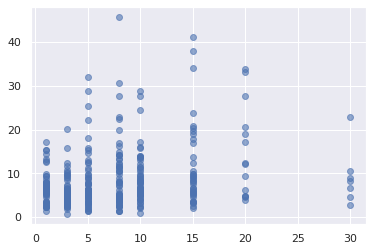

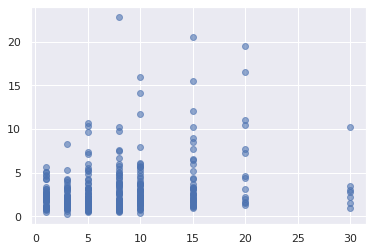

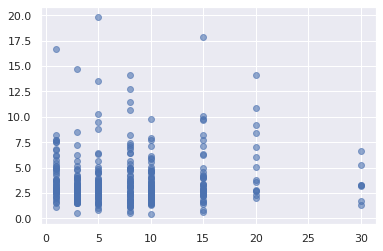

In [394]:
plt.plot(stat_df_res["polymer_concentration"],stat_df_res["mean"],"o",alpha=0.6)
plt.show()
plt.close()
plt.plot(stat_df_res["polymer_concentration"],stat_df_res["std"],"o",alpha=0.6)
plt.show()
plt.close()
plt.plot(stat_df_res["polymer_concentration"],stat_df_res["std_error"],"o",alpha=0.6)
plt.show()
plt.close()
plt.plot(stat_df_res["polymer_concentration"],100*stat_df_res["coeff_of_var_star"],"o",alpha=0.6)
plt.show()
plt.close()

In [395]:
stat_df

count        mean        std  \
substance_code additive polymer_concentration                                 
SB342          None     3                        5.0  163.060000   2.317973   
                        5                        5.0  166.280000   1.314154   
                        8                        8.0  167.287500   5.106141   
                        10                       5.0  180.020000  13.580758   
                        20                       5.0  214.800000  17.143658   
...                                              ...         ...        ...   
TS-019c        None     3                        9.0  234.677778   9.014541   
                        5                        9.0  267.111111   5.277415   
               PVA      1                        9.0  227.144444   9.896099   
                        3                        9.0  257.533333   5.302829   
                        5                        7.0  302.871429   8.609048   

                                                 min     25%     50%      75%  \
substance_code additive polymer_concentration                                   
SB342          None     3                      161.1  161.80  162.00  163.500   
                        5                      164.5  165.60  166.20  167.400   
                        8                      162.5  162.65  165.75  171.775   
                        10                     162.1  177.80  179.50  180.400   
                        20                     190.1  203.60  224.20  227.500   
...                                              ...     ...     ...      ...   
TS-019c        None     3                      222.2  229.40  235.90  241.100   
                        5                      257.0  263.60  267.50  272.100   
               PVA      1                      210.2  219.70  228.60  235.700   
                        3                      249.8  252.40  258.60  260.100   
                        5                      291.3  295.50  306.20  309.000   

                                                 max         var  \
substance_code additive polymer_concentration                      
SB342          None     3                      166.9    5.373000   
                        5                      167.7    1.727000   
                        8                      175.0   26.072679   
                        10                     200.3  184.437000   
                        20                     228.6  293.905000   
...                                              ...         ...   
TS-019c        None     3                      249.4   81.261944   
                        5                      272.7   27.851111   
               PVA      1                      238.7   97.932778   
                        3                      267.2   28.120000   
                        5                      313.6   74.115714   

                                               coeff_of_var  \
substance_code additive polymer_concentration                 
SB342          None     3                          0.014215   
                        5                          0.007903   
                        8                          0.030523   
                        10                         0.075440   
                        20                         0.079812   
...                                                     ...   
TS-019c        None     3                          0.038412   
                        5                          0.019757   
               PVA      1                          0.043567   
                        3                          0.020591   
                        5                          0.028425   

                                               coeff_of_var_star  std_error  \
substance_code additive polymer_concentration                                 
SB342          None     3                               0.014926   1.036629   
                       

In [396]:
for key, group in df.groupby(["substance_code"]):
    for subkey, subgroup in group.groupby(["additive"]):
        data=subgroup[subgroup["valid"]>0]
        x=data["polymer_concentration"]
        y=data["z_average"]
        xe=[]
        ye=[]
        ee=[]
        for c,cgroup in data.groupby(["polymer_concentration"]):
            xe.append(c)
            ye.append(cgroup["z_average"].mean())
            ee.append(cgroup["z_average"].std())
        xe=np.array(xe)
        ye=np.array(ye)
        ee=np.array(ee)

        vx=[]
        vy=[]
        for c, vgroup in subgroup.groupby(["polymer_concentration"]):
            vx.append(c)
            vy.append(vgroup["valid"].mean())

        rvy=[]
        for i in range(len(vy)):
            rvy.append(sum(*[vy[max(i-2,0):min(i+2,len(vy))]])/len(vy[max(i-2,0):min(i+2,len(vy))]))

        i=0
        for c, vgroup in subgroup.groupby(["polymer_concentration"]):
            df.loc[vgroup.index,"roll_valid"]=rvy[i]
            i+=1


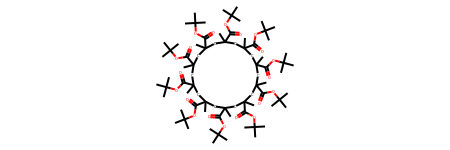

additive: None


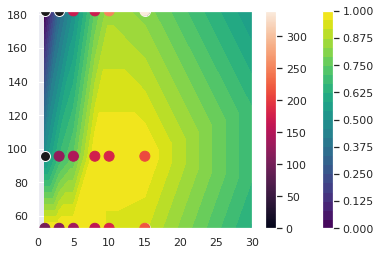

____________________


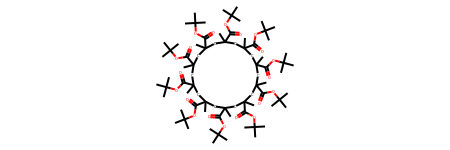

additive: PVA


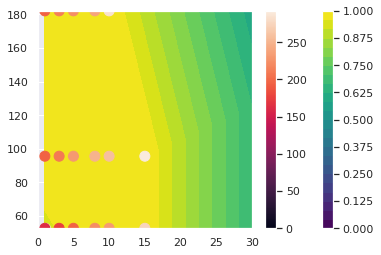

____________________


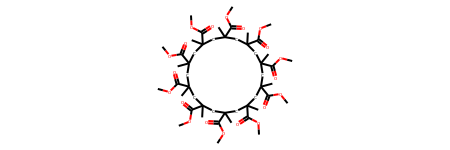

additive: None


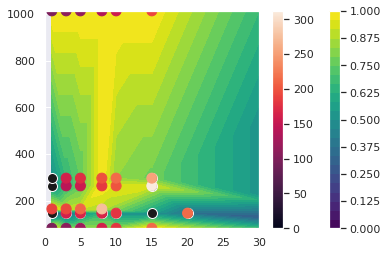

____________________


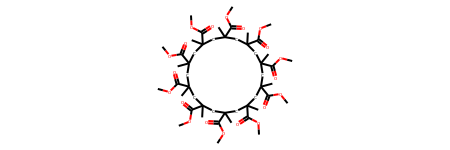

additive: PVA


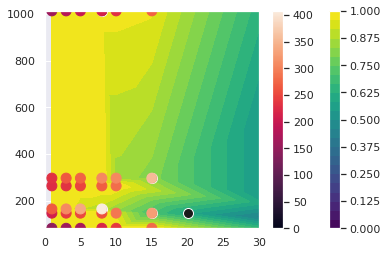

____________________


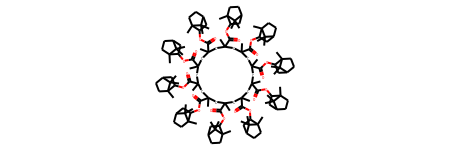

additive: None


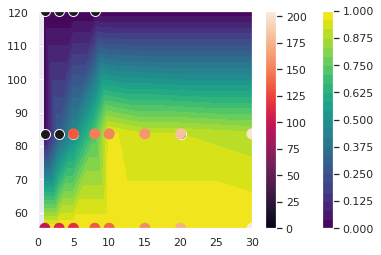

____________________


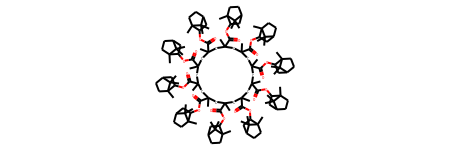

additive: PVA


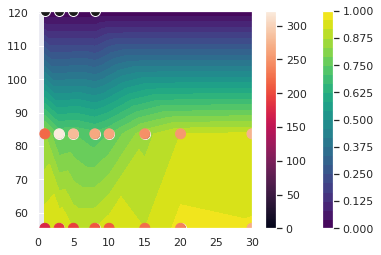

____________________


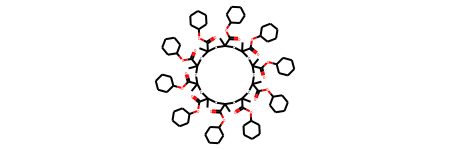

additive: None


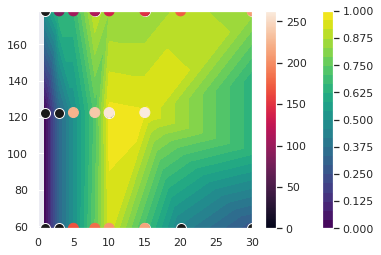

____________________


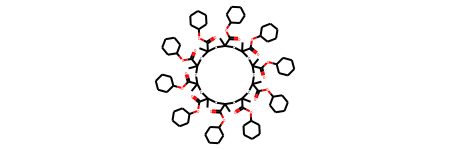

additive: PVA


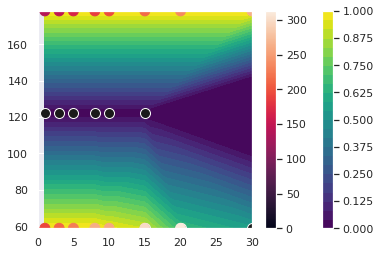

____________________


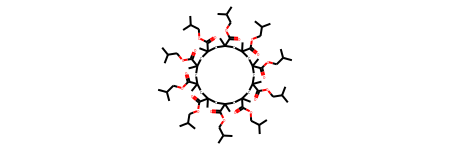

additive: None


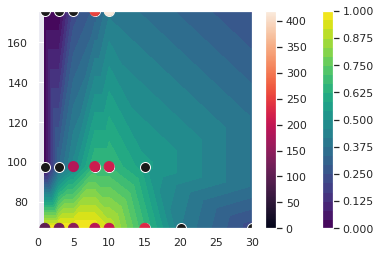

____________________


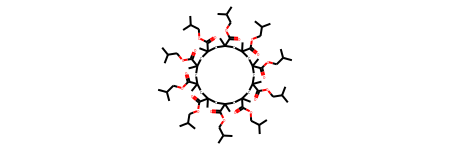

additive: PVA


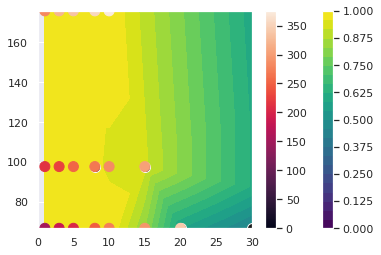

____________________


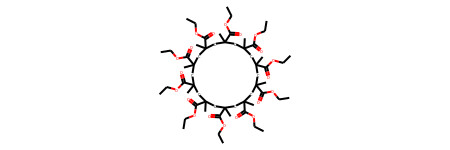

additive: None


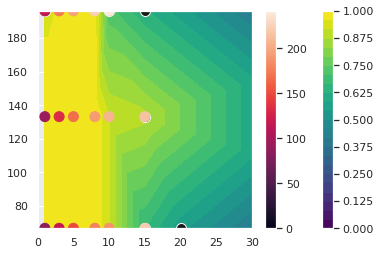

____________________


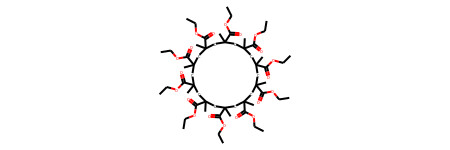

additive: PVA


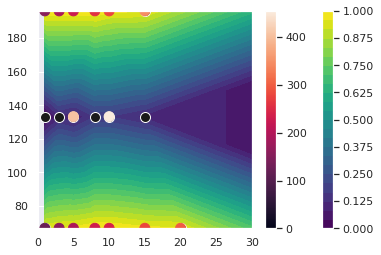

____________________


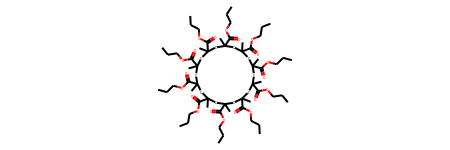

additive: None


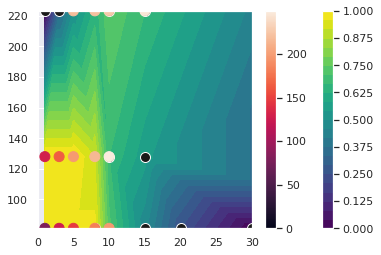

____________________


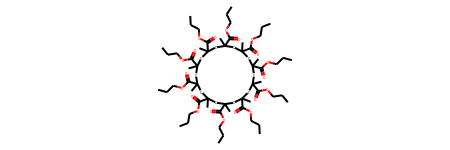

additive: PVA


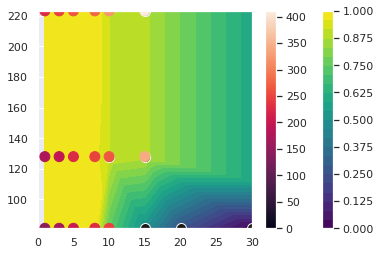

____________________


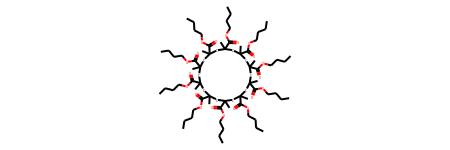

additive: None


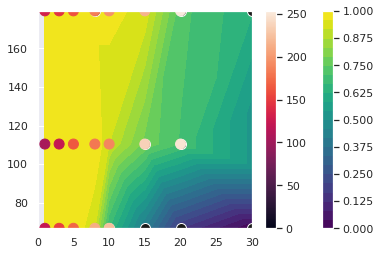

____________________


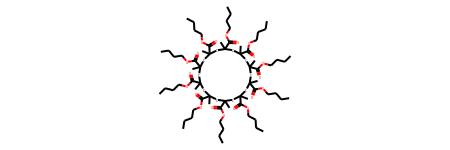

additive: PVA


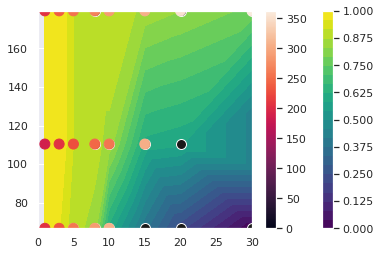

____________________


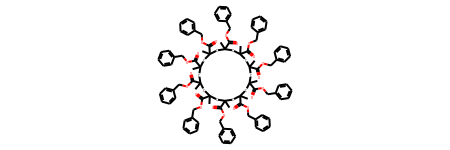

additive: None


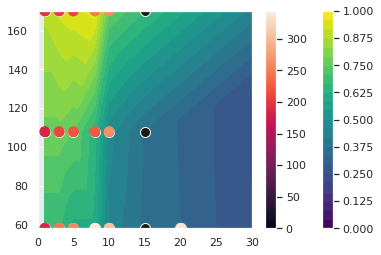

____________________


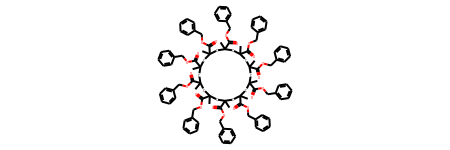

additive: PVA


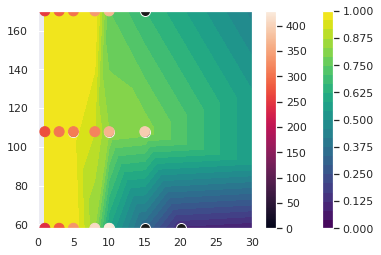

____________________


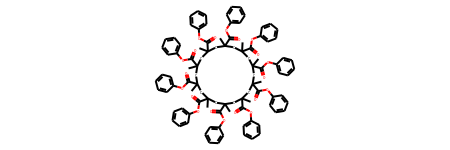

additive: None


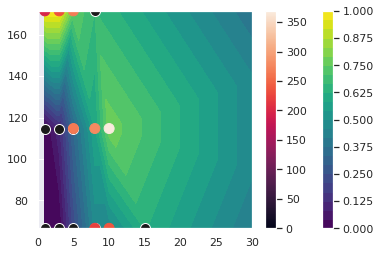

____________________


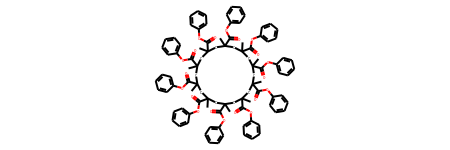

additive: PVA


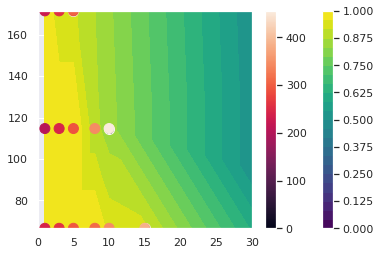

____________________


In [397]:
max_size=df[df["valid"]>0]["z_average"].max()/2
max_conc=df["polymer_concentration"].max()
max_dp=df["dp"].max()
infinite_max_conc=2*max_conc
for key, group  in df.groupby(["circular_smiles_10","additive"]):

    display(rdkit.Chem.MolFromSmiles(key[0]))
    print("additive:", key[1])
    x=[]
    y=[]
    z=[]
    
    xiv=[]
    yiv=[]
    
    xv=[]
    yv=[]
    zv=[]
    for subkey, subgroup in group[group["valid"]>0].groupby(["polymer_concentration","dp"]):
        x.append(subkey[0])
        y.append(subkey[1])
        z.append(subgroup["z_average"].mean())
        
    for subkey, subgroup in group[group["valid"]==0].groupby(["polymer_concentration","dp"]):
        if subgroup["valid"].mean() == 0:
            xiv.append(subkey[0])
            yiv.append(subkey[1])

    max_dp_group=group["dp"].max()
    min_dp_group=group["dp"].min()
    for subkey, subgroup in group.groupby(["polymer_concentration","dp"]):
        xv.append(subkey[0])
        yv.append(subkey[1])
        zv.append(subgroup["roll_valid"].mean())
        
    xv.append(infinite_max_conc)
    xv.append(infinite_max_conc)
    yv.append(min_dp_group)
    yv.append(max_dp_group)
    zv.append(0)
    zv.append(0)
    
    axa =plt.tricontourf(xv,yv,zv,cmap="viridis",levels=np.linspace(0,1.000001,25))
    cba = plt.colorbar(axa)
    axc = plt.scatter(x=xiv,y=yiv,vmin=0,
                      c="k",
                      edgecolors="w",
                s=100
               )
    axb = plt.scatter(x=x,y=y,c=z,vmin=0,
               # vmax=max_size,
                s=100
               )
   
    cbb = plt.colorbar(axb)
    plt.xlim(0, max_conc)
    plt.show()
    plt.close()
    print("_"*20)

In [398]:
fn="z_average_cutoff_{}_dispersity_cutoff_{}_cutoff_size_disp_{}_cutoff_group_size_{}_cutoff_min_conc_{}_valid_threshold_{}_smiles_out_{}".format(
    z_average_cutoff,
    dispersity_cutoff,
    cutoff_size_disp,
    cutoff_group_size,
    cutoff_group_size,
    valid_threshold,
    ".".join(remove_map['smiles_ru'])
)
fn

'z_average_cutoff_500_dispersity_cutoff_0.3_cutoff_size_disp_200_cutoff_group_size_3_cutoff_min_conc_3_valid_threshold_0.2_smiles_out_[CH2][C](C)(C(=O)OC(C)(C)C)'

In [399]:
df["with_pva"] = (df['additive'] == "PVA")*1
train_size_df = df.drop(["monomer_mol","circ_mol","repeating_unit_mol"],axis=1)
train_size_df = train_size_df.drop(train_size_df[train_size_df["valid"]<valid_threshold].index,axis=0)
train_size_df = train_size_df.drop(train_size_df[train_size_df["roll_valid"]<valid_threshold].index,axis=0)
#.to_csv("processed_data.csv",index=False)


out_indiceses=[]
for col,in_list in filter_map.items():
    out = list(set(train_size_df[col].unique())-set(in_list))
    print(out)
    out_indices = train_size_df[train_size_df[col].isin(out)].index
    out_indiceses.extend(out_indices)

for col,in_list in remove_map.items():
    keep = list(set(train_size_df[col].unique())-set(in_list))
    out_indices = train_size_df[~train_size_df[col].isin(keep)].index
    out_indiceses.extend(out_indices)

    
out_indiceses = np.array(list(set(out_indiceses)),dtype=int)
in_indices=np.array(list(set(train_size_df.index)-set(out_indiceses)),dtype=int)

print(len(train_size_df.index),len(in_indices),len(out_indiceses))

train_size_df.loc[in_indices].to_csv("train_data_size_kept_{}.csv".format(fn),index=False)
train_size_df.loc[out_indiceses].to_csv("train_data_size_removed_{}.csv".format(fn),index=False)

train_valid_df = df.drop(["monomer_mol","circ_mol","repeating_unit_mol"],axis=1)
train_valid_df.to_csv("train_data_valid_{}.csv".format(fn),index=False)

[]
2807 2527 280


In [400]:
pd.util.hash_pandas_object(train_size_df.loc[in_indices])

9        4398597714575210335
10       6321200384390163893
11       2246265196193800200
12        990957553201364166
13       1858102333801789868
                ...         
3748     1682364745387964943
3749    12753580087702642448
3750     2774707350882608220
3751     2228742724250463598
3752    12990326375891996556
Length: 2527, dtype: uint64

In [401]:
keep_df = train_size_df.loc[in_indices].reset_index(drop=True)
keep_df.columns

Index(['measurment_data', 'sample', 'temperature', 'z_average', 'dispersity',
       'mean_count_rate', 'volume_mean', 'intensity_mean', 'number_mean',
       'file', 'np_formulation', 'substance_code', 'polymer_class', 'polymer',
       'smiles_monomer', 'smiles_ru', 'mn', 'pdi', 'mn_method', 'tg', 'date',
       'additive', 'polymer_concentration', 'mass_ru', 'circular_smiles_10',
       'dp', 'with_pva', 'valid', 'mean_z_average', 'roll_valid'],
      dtype='object')

In [402]:
stat_data=keep_df[['polymer','dp','additive','polymer_concentration','z_average']].groupby(['polymer','dp','additive','polymer_concentration']).describe()
stat_data

z_average              \
                                                            count        mean   
polymer       dp         additive polymer_concentration                         
PMMA          81.904172  None     1                           9.0   98.466667   
                                  3                           9.0  110.500000   
                                  5                           3.0  121.066667   
                                  8                           9.0  162.633333   
                                  10                          9.0  181.055556   
...                                                           ...         ...   
Polybenzyl MA 170.246574 PVA      1                           9.0  252.500000   
                                  3                           9.0  286.155556   
                                  5                           9.0  302.555556   
                                  8                           9.0  340.366667   
                                  10                          9.0  372.133333   

                                                                            \
                                                               std     min   
polymer       dp         additive polymer_concentration                      
PMMA          81.904172  None     1                       7.824738   88.69   
                                  3                       3.309834  105.80   
                                  5                       2.596793  118.80   
                                  8                       3.646231  157.00   
                                  10                      3.962673  175.70   
...                                                            ...     ...   
Polybenzyl MA 170.246574 PVA      1                      12.681187  233.70   
                                  3                       8.395402  278.30   
                                  5                       5.128380  292.50   
                                  8                      11.575189  321.10   
                                  10                      6.946942  359.70   

                                                                               \
                                                            25%    50%    75%   
polymer       dp         additive polymer_concentration                         
PMMA          81.904172  None     1                       89.04  101.7  104.8   
                                  3                      108.70  110.7  111.1   
                                  5                      119.65  120.5  122.2   
                                  8                      160.50  164.3  165.0   
                                  10                     178.70  180.3  183.1   
...                                                         ...    ...    ...   
Polybenzyl MA 170.246574 PVA      1                      239.40  256.4  262.8   
                                  3                      279.40  284.4  292.5   
                                  5                      300.00  304.2  304.5   
                                  8                      334.70  342.0  343.3   
                                  10                     368.60  372.2  377.0   

                                                                
                                                           max  
polymer       dp         additive polymer_concentration         
PMMA          81.904172  None     1                      108.0  
                                  3                      116.4  
                                  5                      123.9  
                                  8                      167.5  
                                  10                     187.0  
...                                                        ...  
Polybenzyl MA 170.246574 PVA      1                      267.0  
                                  3        

In [403]:
(stat_data[('z_average','max')]-stat_data[('z_average','min')])[176]

108.80000000000001

In [404]:
stat_data.iloc[176]

z_average  count      6.000000
           mean     410.916667
           std       38.039423
           min      359.300000
           25%      387.700000
           50%      414.950000
           75%      425.925000
           max      468.100000
Name: (Poly-Propyl MA, 223.13939970820238, PVA, 15), dtype: float64